In [1]:
#!conda info


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import scipy

In [4]:
train=pd.read_csv(r"C:\Users\AAVEJ\Desktop\Mentorshi\House_price\house-prices-advanced-regression-techniques\train.csv")
test=pd.read_csv(r'C:\Users\AAVEJ\Desktop\Mentorshi\House_price\house-prices-advanced-regression-techniques\test.csv')
train2=train
test2=test

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
print("no of record in train set",format(train.shape[0]))
print("no of columns in train set",format(train.shape[1]))

no of record in train set 1460
no of columns in train set 81


In [10]:
print("no of record in test set",format(test.shape[0]))
print("no of columns in test set",format(test.shape[1]))

no of record in test set 1459
no of columns in test set 80


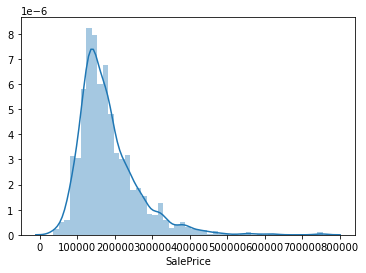

In [11]:
sns.distplot(train['SalePrice'])

In [12]:
print('Skewness of sale price',format(train['SalePrice'].skew()))

Skewness of sale price 1.8828757597682129


In [13]:
print('kurtises of sale price',format(train['SalePrice'].kurt()))

kurtises of sale price 6.536281860064529


In [14]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [15]:
train['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [16]:
train['FullBath'].dtype

dtype('int64')

Text(0, 0.5, 'sale price')

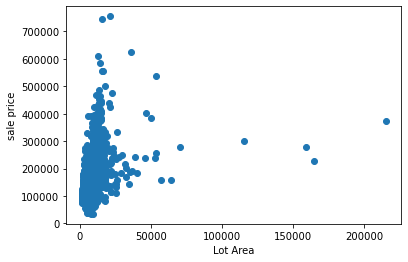

In [17]:
plt.scatter(x=train['LotArea'], y=train['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('sale price')

In [18]:
train['LotArea'].corr(train['SalePrice'])

0.26384335387140573

Text(0, 0.5, 'sale price')

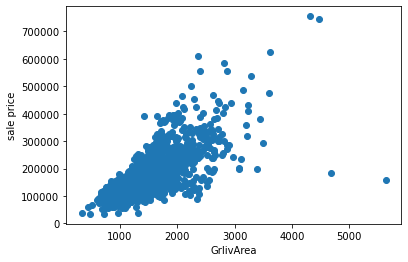

In [19]:
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrlivArea')
plt.ylabel('sale price')

In [20]:
train['GrLivArea'].corr(train['SalePrice'])

0.7086244776126522

Text(0, 0.5, 'sale price')

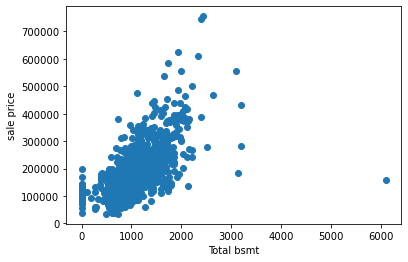

In [21]:
plt.scatter(x=train['TotalBsmtSF'], y=train['SalePrice'])
plt.xlabel('Total bsmt')
plt.ylabel('sale price')

In [22]:
train['TotalBsmtSF'].corr(train['SalePrice'])

0.6135805515591954

In [23]:
train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

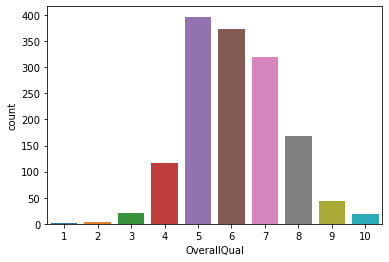

In [24]:
sns.countplot(train['OverallQual'])

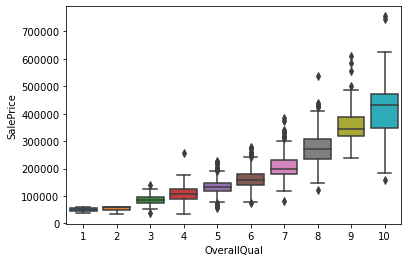

In [25]:
sns.boxplot(x=train['OverallQual'], y=train['SalePrice'])

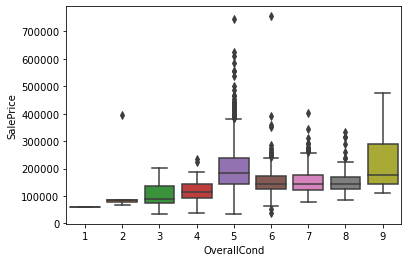

In [26]:
sns.boxplot(x=train['OverallCond'], y=train['SalePrice'])

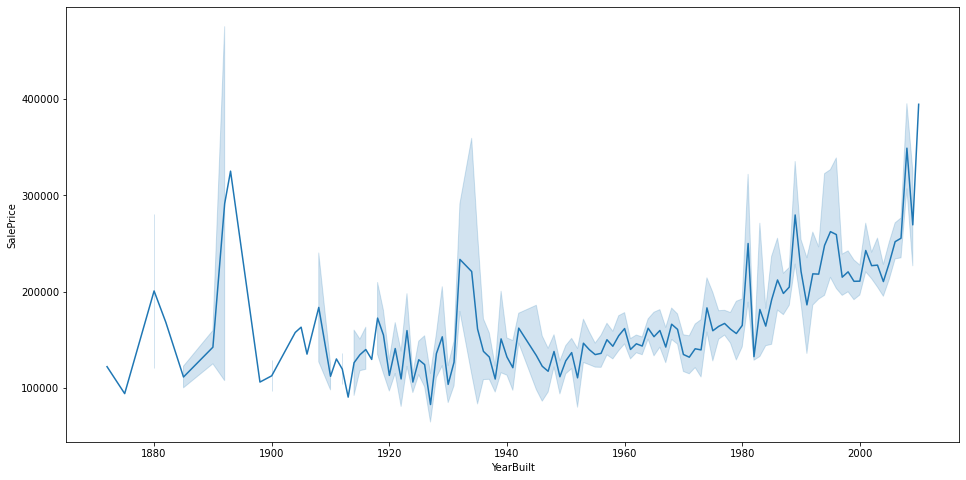

In [27]:
plt.figure(figsize=(16,8))
sns.lineplot(x=train['YearBuilt'], y=train['SalePrice'])

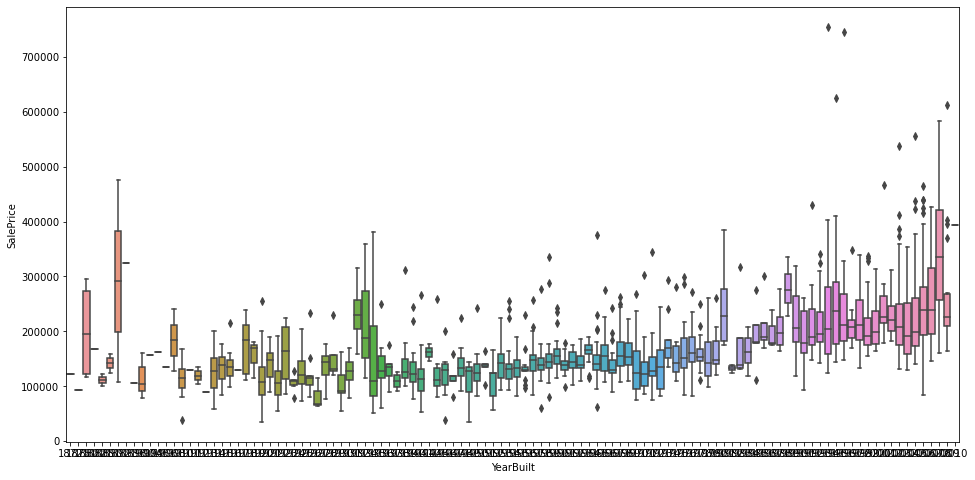

In [28]:
plt.figure(figsize=(16,8))
sns.boxplot(x=train['YearBuilt'], y=train['SalePrice'])

In [29]:
corrmat=train.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


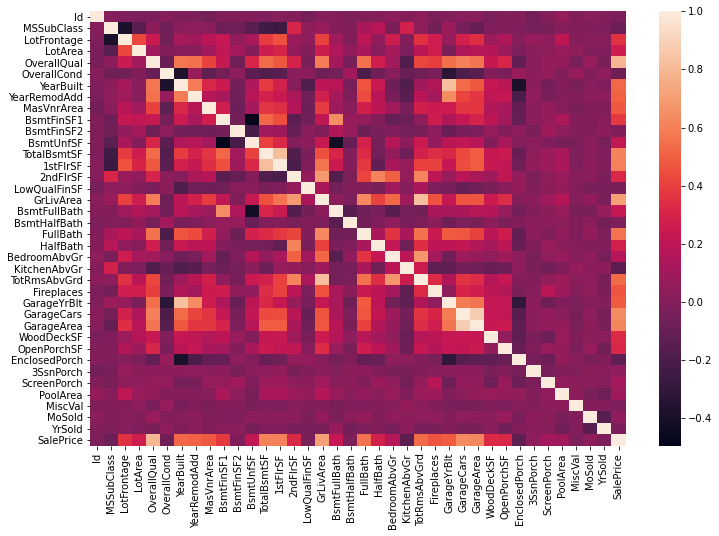

In [30]:
plt.subplots(figsize=(12,8))
sns.heatmap(corrmat)

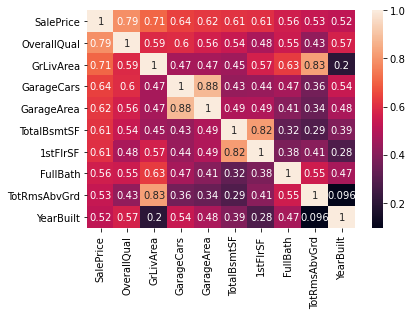

In [31]:
n=10
cols=corrmat.nlargest(n,'SalePrice')['SalePrice'].index
top10=np.corrcoef(train[cols].values.T)
sns.heatmap(top10,yticklabels=cols.values , xticklabels=cols.values , annot=True)

In [32]:
#sns.pairplot(train[cols])

In [33]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [34]:
train.isnull().sum().sum()

6965

In [35]:
print('Missing values in Train Data {}'.format(train.isnull().sum().sum()))

Missing values in Train Data 6965


In [36]:
print('Missing values in Test Data {}'.format(test.isnull().sum().sum()))

Missing values in Test Data 7000


In [37]:
missing_data_train=train.isnull().sum()/len(train)*100
missing_data_train

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [38]:
sort_missing_date=missing_data_train.drop(missing_data_train[missing_data_train==0].index).sort_values(ascending=False)


In [39]:
sort_missing_date

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [40]:

pd.DataFrame(sort_missing_date.head(30))

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [41]:
missing_data_test = test.isnull().sum()/len(test)*100
sort_missing_date = missing_data_train.drop(missing_data_train[missing_data_train == 0].index).sort_values(ascending=False)
pd.DataFrame(sort_missing_date.head(30))

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [42]:
print("no of record in train set",format(train.shape))
print("no of columns in train set",format(test.shape))

no of record in train set (1460, 81)
no of columns in train set (1459, 80)


In [43]:
train=train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id','GarageQual'],axis=1)
test=test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id','GarageQual'],axis=1)

In [44]:
print("no of record in train set",format(train.shape))
print("no of columns in train set",format(test.shape))

no of record in train set (1460, 74)
no of columns in train set (1459, 73)


In [45]:
y=train['SalePrice']
train=train.drop(['SalePrice'],axis=1)

In [46]:
print("no of record in train set",format(train.shape))

no of record in train set (1460, 73)


In [47]:
corr_mat=train.corr().abs()

In [48]:
corr_mat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,0.386347,0.139781,0.032628,0.059316,0.027850,0.040581,0.022936,0.069836,0.065649,...,0.098672,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407
LotFrontage,0.386347,1.000000,0.426095,0.251646,0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,0.139781,0.426095,1.000000,0.105806,0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261
OverallQual,0.032628,0.251646,0.105806,1.000000,0.091932,0.572323,0.550684,0.411876,0.239666,0.059119,...,0.562022,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347
OverallCond,0.059316,0.059213,0.005636,0.091932,1.000000,0.375983,0.073741,0.128101,0.046231,0.040229,...,0.151521,0.003334,0.032589,0.070356,0.025504,0.054811,0.001985,0.068777,0.003511,0.043950
YearBuilt,0.027850,0.123349,0.014228,0.572323,0.375983,1.000000,0.592855,0.315707,0.249503,0.049107,...,0.478954,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,0.067759,...,0.371600,0.205726,0.226298,0.193919,0.045286,0.038740,0.005829,0.010286,0.021490,0.035743
MasVnrArea,0.022936,0.193458,0.104160,0.411876,0.128101,0.315707,0.179618,1.000000,0.264736,0.072319,...,0.373066,0.159718,0.125703,0.110204,0.018796,0.061466,0.011723,0.029815,0.005965,0.008201
BsmtFinSF1,0.069836,0.233633,0.214103,0.239666,0.046231,0.249503,0.128451,0.264736,1.000000,0.050117,...,0.296970,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491,0.003571,0.015727,0.014359
BsmtFinSF2,0.065649,0.049900,0.111170,0.059119,0.040229,0.049107,0.067759,0.072319,0.050117,1.000000,...,0.018227,0.067898,0.003093,0.036543,0.029993,0.088871,0.041709,0.004940,0.015211,0.031706


In [49]:
upper=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))

In [50]:
upper

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,NaN,0.386347,0.139781,0.032628,0.059316,0.027850,0.040581,0.022936,0.069836,0.065649,...,0.098672,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407
LotFrontage,NaN,NaN,0.426095,0.251646,0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,NaN,NaN,NaN,0.105806,0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261
OverallQual,NaN,NaN,NaN,NaN,0.091932,0.572323,0.550684,0.411876,0.239666,0.059119,...,0.562022,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347
OverallCond,NaN,NaN,NaN,NaN,NaN,0.375983,0.073741,0.128101,0.046231,0.040229,...,0.151521,0.003334,0.032589,0.070356,0.025504,0.054811,0.001985,0.068777,0.003511,0.043950
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,0.592855,0.315707,0.249503,0.049107,...,0.478954,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179618,0.128451,0.067759,...,0.371600,0.205726,0.226298,0.193919,0.045286,0.038740,0.005829,0.010286,0.021490,0.035743
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264736,0.072319,...,0.373066,0.159718,0.125703,0.110204,0.018796,0.061466,0.011723,0.029815,0.005965,0.008201
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050117,...,0.296970,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491,0.003571,0.015727,0.014359
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.018227,0.067898,0.003093,0.036543,0.029993,0.088871,0.041709,0.004940,0.015211,0.031706


In [51]:
to_drop=[column for column in upper.columns if any (upper[column] > 0.75)]

In [52]:
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [53]:
train=train.drop(to_drop,axis=1)

In [54]:
test=test.drop(to_drop,axis=1)

Deleted this columuns

In [55]:
train.shape

(1460, 69)

In [56]:
test.shape

(1459, 69)

In [57]:
missing_data_train=train.isnull().sum()/len(train)*100
missing_data_train

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
Length: 69, dtype: float64

In [58]:
sort_missing_date=missing_data_train.drop(missing_data_train[missing_data_train==0].index).sort_values(ascending=False)


In [59]:
pd.DataFrame(sort_missing_date.head(30))

,0
LotFrontage,17.739726
GarageCond,5.547945
GarageFinish,5.547945
GarageType,5.547945
BsmtFinType2,2.602740
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtCond,2.534247
BsmtQual,2.534247
MasVnrArea,0.547945


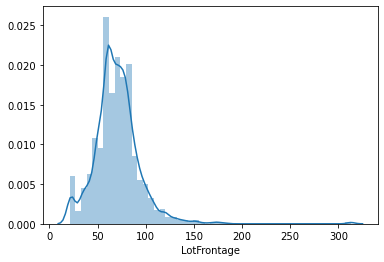

In [60]:
sns.distplot(train['LotFrontage'])

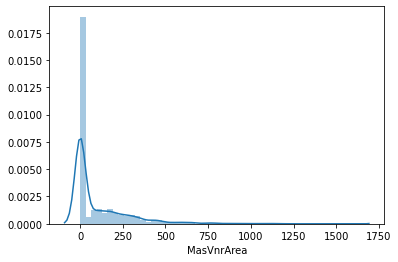

In [61]:
sns.distplot(train['MasVnrArea'])

In [62]:
train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [63]:
train['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [64]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())

In [65]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())

In [66]:
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [67]:
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [68]:
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [69]:
missing_data_test = test.isnull().sum()/len(test)*100
sort_missing_date = missing_data_test.drop(missing_data_test[missing_data_test == 0].index).sort_values(ascending=False)
missing_test = pd.DataFrame(sort_missing_date.head(30))

In [70]:
missing_test

,0
MSZoning,0.27416
Functional,0.13708
BsmtHalfBath,0.13708
BsmtFullBath,0.13708
Utilities,0.13708
SaleType,0.06854
GarageCars,0.06854
KitchenQual,0.06854
TotalBsmtSF,0.06854
BsmtUnfSF,0.06854


In [71]:
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])

In [72]:
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].median())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].median())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].median())

In [81]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())

In [82]:
missing_data_train = train.isnull().sum()/len(train)*100
sort_missing_date = missing_data_train.drop(missing_data_train[missing_data_train == 0].index).sort_values(ascending=False)
pd.DataFrame(sort_missing_date.head(30))

,0


In [83]:
missing_data_test = test.isnull().sum()/len(test)*100
sort_missing_date = missing_data_test.drop(missing_data_test[missing_data_test == 0].index).sort_values(ascending=False)
pd.DataFrame(sort_missing_date.head(30))

,0


In [84]:
train = train.drop_duplicates(keep = 'first')
test = test.drop_duplicates(keep = 'first')

In [85]:
print("Train Data {}".format(train.shape))
print("Test Data {}".format(test.shape))

Train Data (1460, 69)
Test Data (1459, 69)


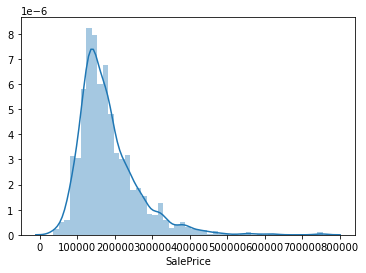

In [86]:
sns.distplot(y);

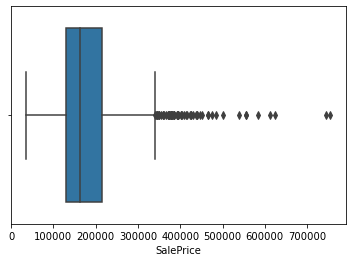

In [87]:
sns.boxplot(y);

In [88]:
train = pd.concat([train, pd.DataFrame(y)], axis = 1)

In [89]:
print("Min Saleprice: {}".format(min(train['SalePrice'])))
print("0th % Saleprice: {}".format(train['SalePrice'].quantile(0)))
print("25th % Saleprice: {}".format(train['SalePrice'].quantile(0.25)))
print("75th % Saleprice: {}".format(train['SalePrice'].quantile(0.75)))
print("100th % Saleprice: {}".format(train['SalePrice'].quantile(1)))
print("Max Saleprice: {}".format(max(train['SalePrice'])))

Min Saleprice: 34900
0th % Saleprice: 34900.0
25th % Saleprice: 129975.0
75th % Saleprice: 214000.0
100th % Saleprice: 755000.0
Max Saleprice: 755000


In [90]:
train = train[train['SalePrice'] < 330000]

In [91]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


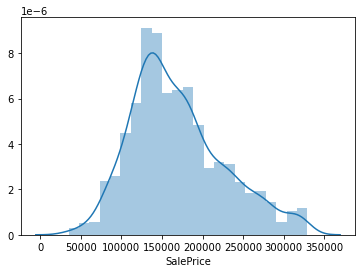

In [92]:
sns.distplot(train['SalePrice']);

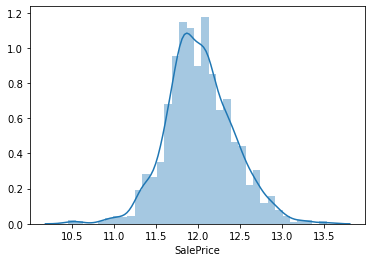

In [93]:
y = np.log(y)
sns.distplot(y);

In [94]:
y = train['SalePrice']
train = train.drop(['SalePrice'], axis = 1)

In [95]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [96]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [97]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', '

In [98]:
train['Total_basement'] = train['BsmtFinSF1'] + train['BsmtFinSF2']  + train['BsmtUnfSF']

In [99]:
train[['Total_basement','TotalBsmtSF']]

,Total_basement,TotalBsmtSF
0,856,856
1,1262,1262
2,920,920
3,756,756
4,1145,1145
...,...,...
1455,953,953
1456,1542,1542
1457,1152,1152
1458,1078,1078


In [100]:
train=train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)
test=test.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)


In [101]:
train=train.drop(['Total_basement'],axis=1)

In [102]:
print(train.shape)
print(test.shape)

(1389, 66)
(1459, 66)


In [103]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondi

In [104]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondi

In [105]:
train=train.drop(['YearBuilt','ExterQual'],axis=1)
test=test.drop(['YearBuilt','ExterQual'],axis=1)


In [106]:
print(train.shape)
print(test.shape)

(1389, 64)
(1459, 64)


In [107]:
train.shape

(1389, 64)

In [108]:
train['PoolArea'].value_counts()

0      1383
738       1
648       1
576       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [109]:
#train=train.drop(['PoolArea'],axis=1)
#test=test.drop(['PoolArea'],axis=1)
#train.head(5)

In [110]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [111]:
train['SaleCondition'].value_counts()

Normal     1161
Abnorml     100
Partial      93
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [112]:
train['Utilities'].value_counts()

AllPub    1388
NoSeWa       1
Name: Utilities, dtype: int64

In [113]:
train=train.drop(['Utilities'],axis=1)
test=test.drop(['Utilities'],axis=1)

In [114]:
#from sklearn.model_selection import train_test_split

In [115]:
#train.Exterior1st.value_counts()

In [116]:
#train.Exterior2nd

In [117]:
print(train.shape)
print(test.shape)

(1389, 63)
(1459, 63)


In [118]:
train['ExterCond'].value_counts()

TA    1216
Gd     141
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [119]:
train['ExterCond']=train['ExterCond'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
train['BsmtQual']=train['BsmtQual'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
train['BsmtCond']=train['BsmtCond'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
train['HeatingQC']=train['HeatingQC'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
train['KitchenQual']=train['KitchenQual'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
train['GarageCond']=train['GarageCond'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})


In [120]:
test['ExterCond']=test['ExterCond'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
test['BsmtQual']=test['BsmtQual'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
test['BsmtCond']=test['BsmtCond'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
test['HeatingQC']=test['HeatingQC'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
test['KitchenQual']=test['KitchenQual'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})
test['GarageCond']=test['GarageCond'].replace({'Po': 1 ,'Fa': 2,'Ta': 3,'Gd': 4,'Ex': 5})


In [121]:
train['SaleCondition'].value_counts()

Normal     1161
Abnorml     100
Partial      93
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [122]:
pd.get_dummies(train['SaleCondition'])

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,0,1,0
1457,0,0,0,0,1,0
1458,0,0,0,0,1,0


In [123]:
train.shape

(1389, 63)

In [124]:
test.shape

(1459, 63)

In [125]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [126]:
train1=train
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2002,162.0,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1970,0.0,756,756,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,2000,0.0,953,694,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1988,119.0,1542,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,2006,0.0,1152,1152,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1996,0.0,1078,0,0,...,0,0,0,1,0,0,0,0,1,0


In [127]:
test1=test
test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,0.0,882.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,108.0,1329.0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1998,0.0,928.0,701,0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,20.0,926.0,678,0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,0.0,1280.0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,0.0,546.0,546,0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,0.0,546.0,546,0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1996,0.0,1224.0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,0.0,912.0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [128]:

SalePrice=np.log10(y)
GrLivArea=train['GrLivArea']

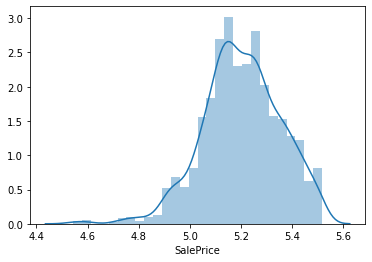

In [129]:
sns.distplot(SalePrice)

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train['GrLivArea'], SalePrice, test_size = 0.2, random_state = 1)

In [131]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1111,)
(278,)
(1111,)
(278,)


In [132]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [135]:
y_pred=lr.predict(X_test)

In [136]:
y_pred    #log value of Y as we have conv into log value

array([5.19423389, 5.24410108, 5.25341238, 5.26210292, 5.12201958,
       5.31548771, 5.1048454 , 5.15202266, 5.27079347, 5.36142346,
       5.03904555, 5.25382621, 5.0849813 , 5.20333827, 5.30907326,
       5.13277931, 5.20664896, 5.06470335, 5.18099115, 5.0849813 ,
       5.15160882, 5.11726047, 5.17312827, 5.30596949, 5.19795841,
       5.13671074, 5.21658101, 5.07877376, 5.39163346, 5.1187089 ,
       5.19609615, 5.17312827, 5.07546308, 5.23954888, 5.23189293,
       5.09118883, 5.25527464, 5.44625976, 5.27037963, 5.41811894,
       5.12595102, 5.05994424, 5.17023142, 5.31838456, 5.07877376,
       5.38687435, 5.27617333, 5.19733766, 5.0849813 , 5.36121654,
       5.24368724, 5.2490671 , 5.09760328, 5.12036424, 5.07546308,
       5.1710591 , 5.26458594, 5.09863787, 5.12595102, 5.21637409,
       5.06097883, 5.15574718, 5.10277623, 5.22506464, 5.25361929,
       5.21058039, 5.20706279, 5.18781944, 5.42867174, 5.07877376,
       5.27327648, 5.20333827, 5.19588923, 5.030355  , 5.16774

In [137]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [138]:
r2_score(Y_test,y_pred)    # how much explain by independent

0.39799333809944326

In [139]:
mean_squared_error(Y_test,y_pred) #MSE

0.014410596578393043

In [140]:
mean_absolute_error(Y_test,y_pred)   #MAE

0.08951445835239108

In [141]:
np.sqrt(mean_squared_error(Y_test,y_pred))   #RMSE

0.12004414429031116

In [142]:
y1=y
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1389, dtype: int64

In [143]:
y=np.log10(y)
X=train

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2, random_state=1 )

In [145]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1111, 251)
(278, 251)
(1111,)
(278,)


In [146]:
y

0       5.319106
1       5.258877
2       5.349278
3       5.146128
4       5.397940
          ...   
1455    5.243038
1456    5.322219
1457    5.425697
1458    5.152670
1459    5.168792
Name: SalePrice, Length: 1389, dtype: float64

In [147]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler , Normalizer  

In [148]:
#sc=StandardScaler()
#sc.fit(X_train)
#X_train=sc.transform(X_train)
#X_test=sc.transform(X_test)

In [149]:
#lrsc=LinearRegression()
#lrsc.fit(X_train,Y_train)

In [150]:
#y_predSc=lrsc.predict(X_test)

In [151]:
#print(r2_score(Y_test,y_predSc))


In [152]:
#mse=mean_squared_error(Y_test,y_predSc)
#mse

In [153]:
#mean_absolute_error(Y_test,y_predSc)

In [154]:
#np.sqrt(mse)

In [155]:
#################################

In [156]:
#Mn=MinMaxScaler()
#Mn.fit(X_train)
#X_train=Mn.transform(X_train)
#X_test=Mn.transform(X_test)

In [157]:
#lrsc=LinearRegression()
#lrsc.fit(X_train,Y_train)

In [158]:
#y_predMn=lrsc.predict(X_test)

In [159]:
#print(r2_score(Y_test,y_predMn))


In [160]:
#mse=mean_squared_error(Y_test,y_predMn)
#mse

In [161]:
#mean_absolute_error(Y_test,y_predMn)

In [162]:
#np.sqrt(mse)

In [163]:
#####################################

In [164]:
nm=Normalizer()

In [165]:
nm.fit(X_train)
X_train=nm.transform(X_train)
X_test=nm.transform(X_test)

In [166]:
X_train.shape

(1111, 251)

In [167]:
Y_train.shape

(1111,)

In [168]:
lr1=LinearRegression()

In [169]:
lr1.fit(X_train,Y_train)

LinearRegression()

In [170]:
y_pred1=lr1.predict(X_test)

In [171]:
y_pred1

array([5.26470792, 5.30695058, 5.1402834 , 5.21562821, 4.64556537,
       5.35192973, 5.16050885, 4.81214764, 5.33127867, 5.04918401,
       5.07417206, 5.11122743, 5.12378092, 5.18276373, 5.2125818 ,
       5.09681699, 5.20429893, 5.0150602 , 5.35180666, 5.04687283,
       5.05746261, 5.10409518, 5.20866704, 5.38757986, 5.10464833,
       5.08766784, 5.35788605, 4.84724018, 5.43148592, 5.12384606,
       5.20519579, 5.20177419, 5.2688628 , 5.2463235 , 5.10028983,
       5.04136845, 5.21218054, 5.34157623, 5.29435385, 5.4762465 ,
       4.7962833 , 4.97356246, 5.28027725, 5.35648659, 5.12950699,
       5.36565018, 5.19309457, 5.34339813, 5.13143265, 5.09972038,
       5.38595753, 5.23628379, 5.08539596, 5.10459866, 5.11276278,
       4.99677191, 5.18138967, 5.0320367 , 5.18421963, 4.8476025 ,
       5.08100451, 5.13480322, 5.12413283, 5.37391584, 5.11834767,
       5.23075358, 5.33151435, 5.29316642, 5.37721916, 5.05780245,
       5.28320008, 5.24189331, 5.24364638, 4.99992309, 5.03390

In [172]:
r2_score(Y_test,y_pred1)

0.8050411126231322

In [173]:
mse=mean_squared_error(Y_test,y_pred1)
mse

0.004666848480531421

In [174]:
mean_absolute_error(Y_test,y_pred1)

0.04800861381013769

In [175]:
np.sqrt(mse)

0.0683143358346652

In [176]:
#print("R2 score for ln={}".format(r2_score(Y_testln,y_predln)))
#print("R2 score for log10={}".format(r2_score(Y_test,y_pred1)))
#print("MSE for ln={}".format(mean_squared_error(Y_testln,y_predln)))
#print("MSE for log10={}".format(mean_squared_error(Y_test,y_pred1)))
#print("RMSE for ln={}".format(np.sqrt(mean_squared_error(Y_testln,y_predln))))
#print("RMSE for log10={}".format(np.sqrt(mean_squared_error(Y_test,y_pred1))))

In [177]:
y

0       5.319106
1       5.258877
2       5.349278
3       5.146128
4       5.397940
          ...   
1455    5.243038
1456    5.322219
1457    5.425697
1458    5.152670
1459    5.168792
Name: SalePrice, Length: 1389, dtype: float64

In [178]:
# PCA


In [179]:
X_train.shape

(1111, 251)

In [180]:
Y_train.shape


(1111,)

In [181]:
from sklearn.decomposition import PCA

In [182]:
pca = PCA(n_components=200)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

In [183]:
print(X_train1.shape)
print(X_test1.shape)

(1111, 200)
(278, 200)


In [184]:
lr=LinearRegression()
lr.fit(X_train1,Y_train)

LinearRegression()

In [185]:
y_train_pred=lr.predict(X_train1)

In [186]:
np.sqrt(mean_squared_error(Y_train,y_train_pred))

0.0483433879114785

In [187]:
r2_score(Y_train,y_train_pred)

0.8986869730710269

In [188]:
y_pred=lr.predict(X_test1)

In [189]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.0637936802344944

In [190]:
r2_score(Y_test,y_pred)

0.8299899280255841

In [191]:
from sklearn.model_selection import GridSearchCV
ridge_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lasso_alpha = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(alpha = lasso_alpha)
param_grid_ = dict(alpha = ridge_alpha)

In [192]:
from sklearn.linear_model import Lasso , Ridge

In [193]:
ls=Lasso()

In [194]:
rd=Ridge()

In [195]:
grid = GridSearchCV(estimator=rd, param_grid=param_grid_, cv=10, scoring= 'r2')
grid.fit(X_train1, Y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='r2')

In [196]:
grid.best_score_

0.6793412338520634

In [197]:
grid.best_params_

{'alpha': 0.001}

In [198]:
# Regularization

In [199]:
X_train.shape

(1111, 251)

In [200]:
Y_train.shape

(1111,)

In [201]:
from sklearn.linear_model import Lasso , Ridge

In [202]:
X_train.shape

(1111, 251)

In [203]:
ls = Lasso()
ls.fit(X_train, Y_train)
y_train_pred = ls.predict(X_train)

In [204]:
np.sqrt(mean_squared_error(Y_train, y_train_pred)) # RMSE

0.15188134592794403

In [205]:
r2_score(Y_train, y_train_pred)

0.0

In [206]:
y_pred = ls.predict(X_test)

In [207]:
np.sqrt(mean_squared_error(Y_test, y_pred)) # RMSE

0.15521910765646676

In [208]:
r2_score(Y_test, y_pred)

-0.006490550050640698

In [209]:
X_train.shape

(1111, 251)

In [210]:
rd = Ridge()

In [211]:
X_train.shape

(1111, 251)

In [212]:
Y_train.shape

(1111,)

In [213]:
rd = Ridge()
rd.fit(X_train, Y_train)

Ridge()

In [214]:
y_train_pred = rd.predict(X_train)

In [215]:
np.sqrt(mean_squared_error(Y_train, y_train_pred)) # RMSE

0.10369063566282812

In [216]:
r2_score(Y_train, y_train_pred)

0.5339095552695043

In [217]:
y_pred = rd.predict(X_test)

In [218]:
np.sqrt(mean_squared_error(Y_test, y_pred)) # RMSE

0.10866426038565033

In [219]:
r2_score(Y_test, y_pred)

0.5067208107176112

In [220]:
# grid Search

In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
ridge_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lasso_alpha = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(alpha = lasso_alpha)
param_grid_ = dict(alpha = ridge_alpha)

In [223]:
grid = GridSearchCV(estimator=ls, param_grid=param_grid, cv=10, scoring= 'r2')

In [224]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [225]:
grid.best_score_

0.4629126451550527

In [226]:
grid.best_params_

{'alpha': 0.001}

In [227]:
grid = GridSearchCV(estimator=ls, param_grid=param_grid, cv=10, scoring= 'r2')
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [228]:
grid.best_score_

0.4629126451550527

In [229]:
grid.best_params_

{'alpha': 0.001}

In [230]:
train1.shape

(1389, 251)

In [231]:
test1.shape

(1459, 237)

In [232]:
a=train1.columns
a

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=251)

In [233]:
b=test1.columns

In [234]:
a=set(a)

In [235]:
b=set(b)

In [236]:
c=a-b

In [237]:
c

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll'}

In [238]:
len(c)

14

In [239]:
test1.shape

(1459, 237)

In [240]:
test1[['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll']] =pd.DataFrame([[0,0,0,0,0,0,0,0,0,0,0,0,0,0]],index=test1.index)

In [241]:
test1.shape

(1459, 251)

In [242]:
train1.shape

(1389, 251)

In [243]:
y_train=y

In [244]:
pca = PCA(n_components=200)
X_train = pca.fit_transform(train1)
X_test = pca.transform(test1)

In [245]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [246]:
pred=lr.predict(X_test)

In [247]:
pred

array([4.93966097, 5.16326662, 5.10537084, ..., 5.15829099, 4.88359125,
       5.3012283 ])

In [248]:
len(pred)

1459

In [249]:
np.power(10,4.94164637)

87427.1598157167

In [250]:
pred1=np.power(10,pred)

In [251]:
pred1

array([ 87028.39461171, 145635.28790267, 127459.09730451, ...,
       143976.29538008,  76487.6373183 , 200091.34328471])

In [252]:
len(pred1)

1459

In [253]:
test2[['Salesprice']] =pd.DataFrame(pred1,index=test1.index)

In [254]:
test2.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Salesprice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,87028.394612
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,145635.287903
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,127459.097305
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,204428.262128
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,199959.686042


In [255]:
test2.shape

(1459, 81)

In [256]:
test2.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Salesprice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84909.159849
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,88729.146634
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,143976.295380
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,76487.637318
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,200091.343285
